In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

tr1 = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

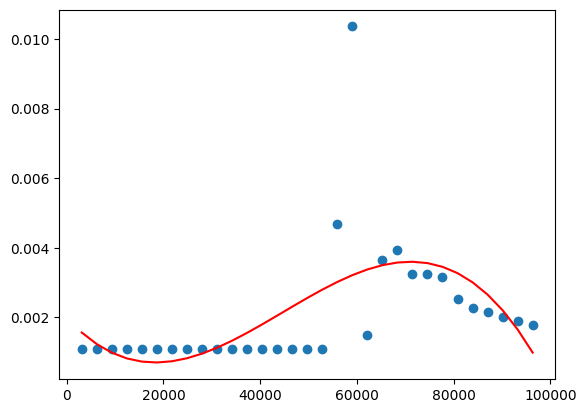

In [3]:
poly_x = PolynomialFeatures(degree=3, include_bias=False).fit_transform(bd1.reshape(-1, 1))
poly_lm = LinearRegression().fit(poly_x, tr1)
pred_poly_vals = poly_lm.predict(poly_x)
plt.scatter(bd1, tr1)
plt.plot(bd1, pred_poly_vals, 'r')